In [65]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report


In [66]:
# Load your dataset
data = pd.read_csv("C:/Users/DELL/Documents/myNewDataSet/ProcessedData.csv")

In [67]:
# Separate features and target
X = data.drop(columns=["Perinatal_Death"])
y = data["Perinatal_Death"]

In [68]:
# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

In [69]:
# Apply SMOTE to your dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

In [70]:
# Split the data into training and testing sets (e.g., 70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


In [71]:
# Map your labels to binary (0 and 1) on the training data
y_train_binary = y_train.copy()
y_train_binary[y_train_binary == 10] = 0  # Map 10 to 0
y_train_binary[y_train_binary == 20] = 1  # Map 20 to 1

In [72]:
# Initialize and train the CART model
cart_model = DecisionTreeClassifier(random_state=42)
cart_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [73]:
# Make predictions on the training data
y_pred_train = cart_model.predict(X_train)

In [74]:
# Calculate confusion matrix
conf_matrix_train = confusion_matrix(y_train_binary, y_pred_train)
print(conf_matrix_train)


[[   0    0 3122    4]
 [   0    0    2 3106]
 [   0    0    0    0]
 [   0    0    0    0]]


In [75]:
# Calculate accuracy
accuracy_train = accuracy_score(y_train_binary, y_pred_train)

In [76]:
# Calculate true positives, true negatives, false positives, and false negatives
tp = 3122  # True Positives (Actual Positive, Predicted Positive)
tn = 3106  # True Negatives (Actual Negative, Predicted Negative)
fp = 4     # False Positives (Actual Negative, Predicted Positive)
fn = 2     # False Negatives (Actual Positive, Predicted Negative)

In [77]:
# Calculate precision
precision_train = tp / (tp + fp) if (tp + fp) > 0 else 0.0

In [78]:
# Calculate recall
recall_train = tp / (tp + fn) if (tp + fn) > 0 else 0.0

In [79]:
# Calculate F1 score
f1_score_train = 2 * (precision_train * recall_train) / (precision_train + recall_train) if (precision_train + recall_train) > 0 else 0.0


In [80]:
print("Precision (Train):", precision_train)
print("Recall (Train):", recall_train)
print("F1 Score (Train):", f1_score_train)

Precision (Train): 0.9987204094689699
Recall (Train): 0.9993597951344431
F1 Score (Train): 0.99904


In [81]:
# Calculate Sensitivity (True Positive Rate)
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0.0

In [82]:
# Calculate Specificity (True Negative Rate)
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0

In [83]:
# Calculate Accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

In [84]:
# Calculate Kappa Statistics
total_observed_accuracy = ((tp + tn) / (tp + tn + fp + fn))
total_possible_accuracy = ((tp + fp) * (tp + fn) + (tn + fp) * (tn + fn)) / ((tp + tn + fp + fn) ** 2)
kappa = (total_observed_accuracy - total_possible_accuracy) / (1 - total_possible_accuracy)


In [85]:
print("Sensitivity (Train):", sensitivity)
print("Specificity (Train):", specificity)
print("Accuracy (Train):", accuracy)
print("Kappa Statistics (Train):", kappa)

Sensitivity (Train): 0.9993597951344431
Specificity (Train): 0.9987138263665595
Accuracy (Train): 0.9990375360923965
Kappa Statistics (Train): 0.9980750597027922


In [86]:
# Classification Report
from sklearn.metrics import classification_report

# Get the unique class labels from y_train_binary
class_labels = sorted(pd.unique(y_train_binary))

classification_report_train = classification_report(
    y_train_binary, y_pred_train, labels=class_labels, target_names=target_names
)

print("Classification Report (Train):\n", classification_report_train)


NameError: name 'target_names' is not defined

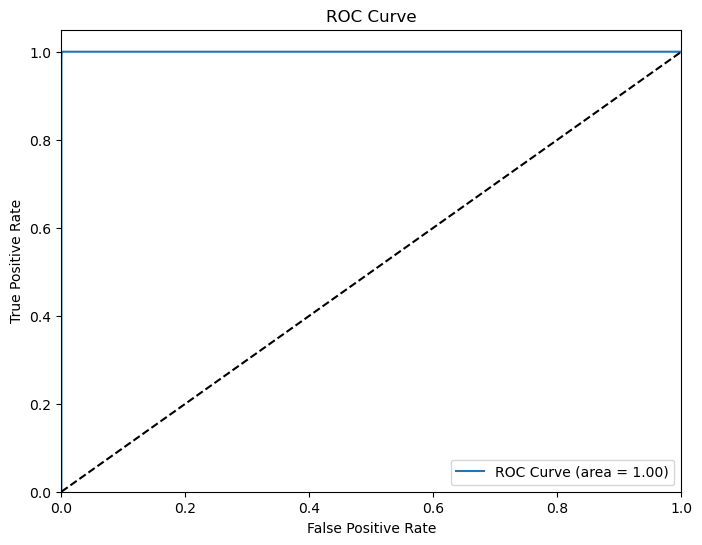

In [87]:
# ROC Curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = cart_model.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train_binary, y_probs)
roc_auc = roc_auc_score(y_train_binary, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

#compairing training and test dataset roc curve

In [88]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [89]:
# Calculate ROC curve for the training dataset
y_pred_train_prob = cart_model.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train_binary, y_pred_train_prob)
roc_auc_train = roc_auc_score(y_train_binary, y_pred_train_prob)

In [90]:
# Map your labels to binary (0 and 1) on the test data
y_test_binary = y_test.copy()
y_test_binary[y_test_binary == 10] = 0  # Map 10 to 0
y_test_binary[y_test_binary == 20] = 1  # Map 20 to 1

# Calculate ROC curve for the test dataset
y_pred_test_prob = cart_model.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test_binary, y_pred_test_prob)
roc_auc_test = roc_auc_score(y_test_binary, y_pred_test_prob)

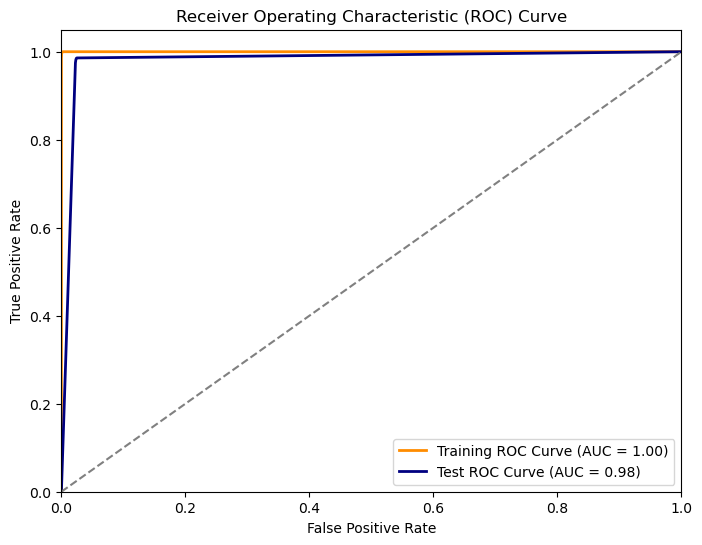

In [91]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Training ROC Curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='navy', lw=2, label=f'Test ROC Curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Confusion Matrix (Actual vs. Predicted):
                  Predicted Positive  Predicted Negative
Actual Positive                3122                   4
Actual Negative                   2                3106


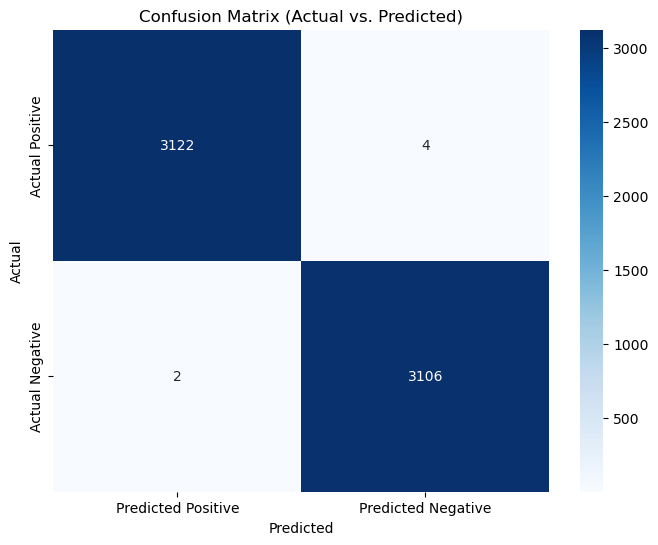

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the values for the confusion matrix
tp = 3122
tn = 3106
fp = 4
fn = 2

# Create a custom confusion matrix
conf_mat = np.array([[tp, fp],
                          [fn, tn]])
# Create a labeled confusion matrix
confusion_matrix_train = pd.DataFrame(conf_mat, columns=[ "Predicted Positive","Predicted Negative"], index=["Actual Positive","Actual Negative"])

# Display the labeled confusion matrix
print("Confusion Matrix (Actual vs. Predicted):\n", confusion_matrix_train)

# Plot a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_train, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Actual vs. Predicted)")

# Save the plot as a PDF file
plt.savefig("C:/Users/DELL/Documents/myNewDataSet/My Models/Figures/CART/confusion matrix train data.svg", format='svg')


plt.show()